# Project: Wrangling and Analyzing Data
### by Mary Etokwudo

## Table of contents

1. [Data Gathering](#gathering)  
2. [Assessing Data](#assessing)  
3. [Identified Issues](#issues)  
4. [Data Cleaning](#cleaning)  
    a. [Issue #1](#issue1)  
    b. [Issue #2](#issue2)  
    c. [Issue #3](#issue3)  
    d. [Issue #4](#issue4)  
    e. [Issue #5](#issue5)  
    f. [Issue #6](#issue6)  
    g. [Issue #7](#issue7)  
    h. [Issue #8](#issue7)  
    i. [Issue #9](#issue9)  
    j. [Issue #10](#issue10)  
5. [Storing Cleaned Data](#storing)  
6. [Analyzing and Visualizing Data](#analyzing)
7. [Insights](#insights)  
8. [Visualization](#visualization)

## Data Gathering <a name="gathering"></a>

In [2]:
# We will do all the required imports here
import pandas as pd
import requests
import os
import tweepy
import configparser
from timeit import default_timer as timer
import json
import re
from IPython.display import Image
import math
import dateutil
import matplotlib.pyplot as plt

%matplotlib inline

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
print(len(twitter_archive.tweet_id))

2356


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# download image-predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]

In [5]:
response = requests.get(url)
with open(file_name, mode = 'wb') as file:
    file.write(response.content)

In [6]:
image_predictions = pd.read_csv(file_name, sep='\t')
print(len(image_predictions.tweet_id))

2075


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# fetch configs
# config = configparser.ConfigParser()
# config.read('config.ini')

# api_key = config['twitter']['api_key']
# api_key_secret = config['twitter']['api_key_secret']
# access_token = config['twitter']['access_token']
# access_token_secret = config['twitter']['access_token_secret']
api_key = ""
api_key_secret = ""
access_token = ""
access_token_secret = ""

In [8]:
# set up tweepy api
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
# Let's query th twitter API
error_record = {}
count = 0
start = timer()
with open('tweet_json.txt', mode = 'w', encoding='utf-8') as file:
    # for each tweet id write to this file
    for tweet_id in twitter_archive.tweet_id.values:
        count +=1
        print(str(count) + ": " + str(tweet_id))
        try:
            api_data = api.get_status(tweet_id, tweet_mode="extended")
            json.dump(api_data._json, file)
            file.write("\n")
        except tweepy.error.TweepError as e:
            error_record[tweet_id] = e
end = timer()
duration = end - start
print("It took " + str(duration/60) + " minutes to run")

In [10]:
# check for tweets that we couldn't fetch, to be sure they all had errors
print(len(error_record))
error_record

In [11]:
# view the tweet_json file
with open('tweet_json.txt') as file:
    tweet_json = pd.read_json(file, lines=True, encoding='utf-8')
print(len(tweet_json))

2327


## Assessing Data <a name="assessing"></a>

#### Visual Assessment
Let's take a look at the 3 dataframes

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
tweet_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33697,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,6976,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29232,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5278,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21975,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3466,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36779,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7190,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35166,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7723,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",17738,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,2586,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",10325,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1649,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56644,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,15692,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",24433,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,3605,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",27846,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,6075,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


We do not need all data in the tweet_json file. We only need the tweet id, favorite_count and retweet_count. So we would only work with what we need. Let have a copy of the dataframe and drop the fields we don't need afterwards. This will help us to focus on the important information for our analysis.

In [15]:
tweet_json_copy = tweet_json.copy()

In [16]:
# We need the columns ['id', 'id_str','favorite_count', 'retweet_count']
tweet_json_copy.drop(tweet_json_copy.columns.difference(['id','favorite_count', 'retweet_count']), 1, inplace=True)
tweet_json_copy.head()

,favorite_count,id,retweet_count
0,33697,892420643555336193,6976
1,29232,892177421306343426,5278
2,21975,891815181378084864,3466
3,36779,891689557279858688,7190
4,35166,891327558926688256,7723


Visually assessing the dataframes, we can pick out the following issues:
1. The tweets data we need are in 3 tables. 
2. Dog stages are in 3 different columns
3. Rating denominator more than 10
4. From the predictions table that shows the dog breed prediction, we can see that some preictions are not for dogs. This means that some of the tweets are not for dogs.

Let's do a programmatic assessment to fish out more issues

#### Programmatic Assessment
Let us run programmatic assessment for the 3 datasets. We would makes use of 3 methods - info, describe and dupicated.

In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
# let's check if there are duplicated tweets using the tweet_id column
twitter_archive['tweet_id'].duplicated().any()

False

In [19]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- From the report above, there are 181 tweets that are retweets and we don't need them.
- We have just 2297 entries with URLs
- The timestamp has both the date and time.
- rating_numerator with a max value of 1776 and rating_denominator max value of 170. These numbers are way higher than expected. 

In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions['tweet_id'].duplicated().any()

False

Programmatically, this table looks clean, though we have a missing-data problem (2075 rows instead of 2356). Since our prediction confidents values are in percentage, let check to be sure that no value is above 100% or 1.

In [22]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Things look okay here. Let's see for tweet_json

In [23]:
tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
favorite_count    2327 non-null int64
id                2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [24]:
tweet_json_copy['id'].duplicated().any()

False

In [25]:
tweet_json_copy.describe()

,favorite_count,id,retweet_count
count,2327.000000,2.327000e+03,2327.000000
mean,7027.571981,7.417930e+17,2460.442630
std,10919.018828,6.820795e+16,4166.998618
min,0.000000,6.660209e+17,1.000000
25%,1221.000000,6.781394e+17,492.500000
50%,3038.000000,7.178418e+17,1146.000000
75%,8567.000000,7.986547e+17,2846.000000
max,144273.000000,8.924206e+17,70398.000000


Programmatically, this table looks clean, though we have a missing-data problem (2327 rows instead of 2356, compared to the tweet_archive table). This means that we couldn't fetch the data we need for some of the tweets.

## In summary, these are the data issues we have been able to pick: <a name="issues"></a>

### Quality issues
- 181 tweets that are retweets and we don't need them.
- The source column contains the device the tweet was sent from but has other characters in it. We can't work with the data in that form.
- Some columns are not neccessary (especially after we drop the retweets).
- The timestamp contains date and time. We need to separate them.
- Wrong ratings (I think that ratings with float values were wrongly extracted).
- Rating numerator higher than 20 with a denominator in multiples of 10.
- Rating denominator less than 10 (for tweet_id 666287406224695296)
- Since we have 2075 data entries in the image prediction table, it means that some tweets don't have images and we won't be working with those tweets.
- rating_numerator with a value of 1776 and rating_denominator value of 10. This number is way higher than expected (compared to the mean and the percentile values).
- Wrong names in the name column (for instance, tweet_id 856526610513747968)
- Some of the tweets are not for dogs.

### Tidiness issues
- The tweets data we need are in 3 tables. 
- Dog stages are in 3 different columns

## Cleaning Data <a name="cleaning"></a>

In [26]:
# Make copies of original pieces of data
# we already made a copy of tweet_json as tweet_json_copy. Let's make a copy of the others
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()

### Issue #1: <a name="issue1"></a>

#### Define

181 tweets that are retweets and we don't need them.

#### Code

We will be dropping tweets that are retweets, from the twitter_archive_copy table

In [27]:
twitter_archive_copy.drop(twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].notna()].index, inplace = True)

#### Test

In [28]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

We have dropped the retweets.

### Issue #2: <a name="issue2"></a>

#### Define

The tweets data we need are in 3 tables. We will merge these 3 tables based on the tweet_ids.

#### Code

In [29]:
# For column name consistensy, let's rename the id column to tweet_id for tweet_json_copy
tweet_json_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

In [30]:
# first merge twitter_archive_copy and tweet_json_copy
# We will use an inner join for these two tables because we want to keep only tweets that we could find on twitter
# and also maintain the cleaning we did where we removed tweets that are retweets
merged_df_sub = pd.merge(twitter_archive_copy, tweet_json_copy, on="tweet_id")
print(merged_df_sub.shape)
merged_df_sub

(2167, 19)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,33697,6976
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,29232,5278
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,21975,3466
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,36779,7190
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,35166,7723
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,17738,2586
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,10325,1649
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,56644,15692
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,24433,3605
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,27846,6075


In [31]:
# second merge - image_predictions
merged_df = pd.merge(merged_df_sub, image_predictions_copy, on="tweet_id")
print(merged_df.shape)
merged_df

(1986, 30)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


#### Test

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 30 columns):
tweet_id                      1986 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1986 non-null object
source                        1986 non-null object
text                          1986 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1986 non-null object
rating_numerator              1986 non-null int64
rating_denominator            1986 non-null int64
name                          1986 non-null object
doggo                         1986 non-null object
floofer                       1986 non-null object
pupper                        1986 non-null object
puppo                         1986 non-null object
favorite_count                1986 non

### Issue #3: <a name="issue3"></a>

#### Define

Some columns are not neccessary. We would be dropping the columns - in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

#### Code

In [33]:
merged_df.drop(['in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [34]:
merged_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'timestamp', 'source', 'text',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorite_count', 'retweet_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

We have successfully dropped the columns but as we clean further, we may have to drop more columns

### Issue #4: <a name="issue4"></a>

#### Define

The timestamp contains date and time. We need to separate them incase we need to compare tweets based on the times and days of the week.

#### Code

In [35]:
# let us get the date and time from the timestamp into different columns. 
# We may later choose to analyse our data based on the days they were tweeted and the time of the day
merged_df['timestamp'] = merged_df['timestamp'].apply(lambda x: pd.to_datetime(x))
merged_df['date'] = merged_df['timestamp'].dt.strftime("%Y-%m-%d")
merged_df['time'] = merged_df['timestamp'].dt.strftime("%H:%M:%S")

merged_df.drop(['timestamp'], axis=1, inplace=True)

#### Test

In [36]:
merged_df

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time
0,892420643555336193,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,16:23:56
1,892177421306343426,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27
2,891815181378084864,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,00:18:03
3,891689557279858688,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30,15:58:51
4,891327558926688256,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29,16:00:24
5,891087950875897856,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2017-07-29,00:08:17
6,890971913173991426,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2017-07-28,16:27:12
7,890729181411237888,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,2017-07-28,00:22:40
8,890609185150312448,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,2017-07-27,16:25:51
9,890240255349198849,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,2017-07-26,15:59:51


### Issue #5: <a name="issue5"></a>

#### Define

Dog stages are in 3 different columns

#### Code

In [37]:
# We need to melt the dog stages into one coluumn
copy = merged_df.copy()
# Note the columns we want to keep
keep_cols = ['tweet_id', 'date', 'time', 'text', 'rating_numerator','rating_denominator', 'name', 'favorite_count', 'retweet_count', 'in_reply_to_status_id',
           'source', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
melted_copy = pd.melt(copy, id_vars=keep_cols, var_name='dog_stage', value_vars=['doggo', 'floofer', 'pupper', 'puppo'])
melted_copy

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,in_reply_to_status_id,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,value
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,33697,6976,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,29232,5278,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,21975,3466,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None
3,891689557279858688,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,36779,7190,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None
4,891327558926688256,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,35166,7723,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None
5,891087950875897856,2017-07-29,00:08:17,Here we have a majestic great white breaching ...,13,10,None,17738,2586,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,doggo,None
6,890971913173991426,2017-07-28,16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,10325,1649,NaN,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,doggo,None
7,890729181411237888,2017-07-28,00:22:40,When you watch your owner call another dog a g...,13,10,None,56644,15692,NaN,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,doggo,None
8,890609185150312448,2017-07-27,16:25:51,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,24433,3605,NaN,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,doggo,None
9,890240255349198849,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,27846,6075,NaN,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,doggo


In [38]:
melted_copy.dog_stage.value_counts()

doggo      1986
puppo      1986
floofer    1986
pupper     1986
Name: dog_stage, dtype: int64

From observing our table, we can see that we have more rows now as a result of the melting we did. We have to get back our original number of rows by dropping rows whose melted values are "None" 

In [39]:
# let us drop the rows that have value as "None"
melted_copy.drop(melted_copy.loc[melted_copy['value'] == 'None'].index, inplace=True)

In [40]:
# we should also drop the value column since the dog_stage column has the information we need
melted_copy.drop(columns=['value'], inplace=True)

In [41]:
melted_copy

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,in_reply_to_status_id,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
9,890240255349198849,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,27846,6075,NaN,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo
37,884162670584377345,2017-07-09,21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,17893,2493,NaN,...,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,doggo
81,872967104147763200,2017-06-09,00:02:31,Here's a very large dog. He has a date later. ...,12,10,None,23983,4546,NaN,...,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,doggo
88,871515927908634625,2017-06-04,23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,17847,2928,NaN,...,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,doggo
97,869596645499047938,2017-05-30,16:49:31,This is Scout. He just graduated. Officially a...,12,10,Scout,14139,2629,NaN,...,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,doggo
136,858843525470990336,2017-05-01,00:40:27,I have stumbled puppon a doggo painting party....,13,10,None,14084,3019,NaN,...,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True,doggo
147,855851453814013952,2017-04-22,18:31:02,Here's a puppo participating in the #ScienceMa...,13,10,None,41815,16087,NaN,...,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,doggo
153,854010172552949760,2017-04-17,16:34:26,"At first I thought this was a shy doggo, but i...",11,10,None,14811,2786,NaN,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,doggo
184,846514051647705089,2017-03-28,00:07:32,This is Barney. He's an elder doggo. Hitches a...,13,10,Barney,41078,10354,NaN,...,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True,doggo
189,845397057150107648,2017-03-24,22:08:59,Say hello to Mimosa. She's an emotional suppor...,13,10,Mimosa,7074,1618,NaN,...,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True,doggo


Ooppss! The table above shows that we only have 316 rows left, but we expected 1986 rows.

This means that in the original data, we might have had some dog stages that were neither of the 4 dog stages and had "None" values for the four stages. They ended up getting dropped when we dropped stages with "None" values. This was not what we intended.

To fix this problem, let us redo the melting but before then we will pick out those rows without dog stage, keep them in a diff dataframe and later add them back after we melt the original data frame. We will maintain a "None" dog stage for these rows we picked out.

In [42]:
copy2 = merged_df.copy()
copy2

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time
0,892420643555336193,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,16:23:56
1,892177421306343426,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27
2,891815181378084864,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,00:18:03
3,891689557279858688,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30,15:58:51
4,891327558926688256,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29,16:00:24
5,891087950875897856,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2017-07-29,00:08:17
6,890971913173991426,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2017-07-28,16:27:12
7,890729181411237888,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,2017-07-28,00:22:40
8,890609185150312448,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,2017-07-27,16:25:51
9,890240255349198849,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,2017-07-26,15:59:51


In [43]:
others = copy2.query("pupper != 'pupper' & doggo != 'doggo' & puppo != 'puppo' & floofer != 'floofer'")
has_stage = copy2.query("pupper == 'pupper' | doggo == 'doggo' | puppo == 'puppo' | floofer == 'floofer'")

In [44]:
others

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time
0,892420643555336193,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,16:23:56
1,892177421306343426,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27
2,891815181378084864,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,00:18:03
3,891689557279858688,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30,15:58:51
4,891327558926688256,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29,16:00:24
5,891087950875897856,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2017-07-29,00:08:17
6,890971913173991426,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2017-07-28,16:27:12
7,890729181411237888,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,2017-07-28,00:22:40
8,890609185150312448,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,2017-07-27,16:25:51
10,890006608113172480,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13,10,Koda,None,None,None,...,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,2017-07-26,00:31:25


In [45]:
has_stage

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time
9,890240255349198849,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,2017-07-26,15:59:51
12,889665388333682689,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,None,None,None,None,...,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,2017-07-25,01:55:32
14,889531135344209921,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,13,10,Stuart,None,None,None,...,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,2017-07-24,17:02:04
28,886366144734445568,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,None,None,pupper,...,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,2017-07-15,23:25:31
37,884162670584377345,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,None,None,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,2017-07-09,21:29:42
40,883360690899218434,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,13,10,Grizzwald,None,floofer,None,...,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,2017-07-07,16:22:55
43,882762694511734784,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,12,10,Gus,None,None,pupper,...,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True,2017-07-06,00:46:41
49,881536004380872706,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,14,10,a,None,None,pupper,...,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,2017-07-02,15:32:16
62,878776093423087618,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,13,10,Snoopy,None,None,None,...,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True,2017-06-25,00:45:22
69,876838120628539392,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,12,10,Ginger,None,None,pupper,...,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True,2017-06-19,16:24:33


Now that we have separated our dataframe, let us melt the dataframe that has dog stages

In [46]:
# first we will define the columns we want to keep
keep_cols = ['tweet_id', 'date', 'time', 'text', 'rating_numerator','rating_denominator', 'name', 'favorite_count', 'retweet_count', 'in_reply_to_status_id',
           'source', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

# then we melt the dog stage columns
melted_stages = pd.melt(has_stage, id_vars=keep_cols, var_name='dog_stage', value_vars=['doggo', 'floofer', 'pupper', 'puppo'])
melted_stages

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,in_reply_to_status_id,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,value
0,890240255349198849,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,27846,6075,NaN,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,doggo
1,889665388333682689,2017-07-25,01:55:32,Here's a puppo that seems to be on the fence a...,13,10,None,41870,8309,NaN,...,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,doggo,None
2,889531135344209921,2017-07-24,17:02:04,This is Stuart. He's sporting his favorite fan...,13,10,Stuart,13307,1874,NaN,...,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,doggo,None
3,886366144734445568,2017-07-15,23:25:31,This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,18496,2613,NaN,...,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,doggo,None
4,884162670584377345,2017-07-09,21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,17893,2493,NaN,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,doggo,doggo
5,883360690899218434,2017-07-07,16:22:55,Meet Grizzwald. He may be the floofiest floofe...,13,10,Grizzwald,19885,3061,NaN,...,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,doggo,None
6,882762694511734784,2017-07-06,00:46:41,This is Gus. He's quite the cheeky pupper. Alr...,12,10,Gus,24700,4080,NaN,...,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True,doggo,None
7,881536004380872706,2017-07-02,15:32:16,Here is a pupper approaching maximum borkdrive...,14,10,a,43304,13354,NaN,...,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,doggo,None
8,878776093423087618,2017-06-25,00:45:22,This is Snoopy. He's a proud #PrideMonthPuppo....,13,10,Snoopy,17072,3422,NaN,...,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True,doggo,None
9,876838120628539392,2017-06-19,16:24:33,This is Ginger. She's having a ruff Monday. To...,12,10,Ginger,18163,2795,NaN,...,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True,doggo,None


In [47]:
# let us drop the rows that have value as "None"
melted_stages.drop(melted_stages.loc[melted_stages['value'] == 'None'].index, inplace=True)

In [48]:
# we should also drop the value column since the dog_stage column has the information we need
melted_stages.drop(columns=['value'], inplace=True)
melted_stages

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,in_reply_to_status_id,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,890240255349198849,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,27846,6075,NaN,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo
4,884162670584377345,2017-07-09,21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,17893,2493,NaN,...,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,doggo
13,872967104147763200,2017-06-09,00:02:31,Here's a very large dog. He has a date later. ...,12,10,None,23983,4546,NaN,...,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,doggo
15,871515927908634625,2017-06-04,23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,17847,2928,NaN,...,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,doggo
16,869596645499047938,2017-05-30,16:49:31,This is Scout. He just graduated. Officially a...,12,10,Scout,14139,2629,NaN,...,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,doggo
20,858843525470990336,2017-05-01,00:40:27,I have stumbled puppon a doggo painting party....,13,10,None,14084,3019,NaN,...,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True,doggo
21,855851453814013952,2017-04-22,18:31:02,Here's a puppo participating in the #ScienceMa...,13,10,None,41815,16087,NaN,...,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,doggo
23,854010172552949760,2017-04-17,16:34:26,"At first I thought this was a shy doggo, but i...",11,10,None,14811,2786,NaN,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,doggo
25,846514051647705089,2017-03-28,00:07:32,This is Barney. He's an elder doggo. Hitches a...,13,10,Barney,41078,10354,NaN,...,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True,doggo
26,845397057150107648,2017-03-24,22:08:59,Say hello to Mimosa. She's an emotional suppor...,13,10,Mimosa,7074,1618,NaN,...,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True,doggo


We are expecting 305 rows but we got 316. This may mean that some tweets have two or more dog stages, causing us to still have more than one copy of a tweet. Let us check.

In [49]:
print(melted_stages['tweet_id'].duplicated().sum())
melted_stages[melted_stages.duplicated(['tweet_id'], keep=False)]

11


,tweet_id,date,time,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,in_reply_to_status_id,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
21,855851453814013952,2017-04-22,18:31:02,Here's a puppo participating in the #ScienceMa...,13,10,None,41815,16087,NaN,...,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,doggo
23,854010172552949760,2017-04-17,16:34:26,"At first I thought this was a shy doggo, but i...",11,10,None,14811,2786,NaN,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,doggo
59,817777686764523521,2017-01-07,16:59:28,"This is Dido. She's playing the lead role in ""...",13,10,Dido,10202,2515,NaN,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
68,808106460588765185,2016-12-12,00:29:28,Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,8362,2060,NaN,...,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,doggo
72,802265048156610565,2016-11-25,21:37:47,"Like doggo, like pupper version 2. Both 11/10 ...",11,10,None,6602,1287,7.331095e+17,...,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True,doggo
74,801115127852503040,2016-11-22,17:28:25,This is Bones. He's being haunted by another d...,12,10,Bones,7659,1981,NaN,...,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,doggo
87,785639753186217984,2016-10-11,00:34:48,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,7438,2100,NaN,...,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,doggo
106,759793422261743616,2016-07-31,16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,5564,1756,NaN,...,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,doggo
118,751583847268179968,2016-07-09,01:08:47,Please stop sending it pictures that don't eve...,5,10,None,4089,1001,NaN,...,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,doggo
139,741067306818797568,2016-06-10,00:39:48,This is just downright precious af. 12/10 for ...,12,10,just,8835,2803,NaN,...,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,doggo


We actaully have duplicates.

In [50]:
# inspecting the original dataframe for one of the tweets, we can see that it actually has more than one dog stage
twitter_archive[twitter_archive.tweet_id == 854010172552949760]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


I initially thought of keeping one copy of these duplicates but further investigation reveals situations where either one of the dog stages is wrong or they both represent two dogs like in the tweet above. We can't randomly pick one of the duplicates. I think the best thing to do would be to drop the duplicates entirely. They are not much so we can still make do with the remaining data for our analytics.

In [51]:
melted_stages.drop_duplicates(subset='tweet_id', keep=False, inplace=True)

In [52]:
melted_stages

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,in_reply_to_status_id,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,890240255349198849,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,27846,6075,NaN,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo
4,884162670584377345,2017-07-09,21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,17893,2493,NaN,...,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,doggo
13,872967104147763200,2017-06-09,00:02:31,Here's a very large dog. He has a date later. ...,12,10,None,23983,4546,NaN,...,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,doggo
15,871515927908634625,2017-06-04,23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,17847,2928,NaN,...,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,doggo
16,869596645499047938,2017-05-30,16:49:31,This is Scout. He just graduated. Officially a...,12,10,Scout,14139,2629,NaN,...,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,doggo
20,858843525470990336,2017-05-01,00:40:27,I have stumbled puppon a doggo painting party....,13,10,None,14084,3019,NaN,...,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True,doggo
25,846514051647705089,2017-03-28,00:07:32,This is Barney. He's an elder doggo. Hitches a...,13,10,Barney,41078,10354,NaN,...,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True,doggo
26,845397057150107648,2017-03-24,22:08:59,Say hello to Mimosa. She's an emotional suppor...,13,10,Mimosa,7074,1618,NaN,...,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True,doggo
30,836753516572119041,2017-03-01,01:42:39,This is Meera. She just heard about taxes and ...,12,10,Meera,18084,4257,NaN,...,mortarboard,0.936882,False,academic_gown,0.020815,False,schipperke,0.011564,True,doggo
32,834574053763584002,2017-02-23,01:22:14,Here's a doggo fully pupared for a shower. H*c...,13,10,None,12789,2311,NaN,...,toilet_tissue,0.262936,False,golden_retriever,0.226564,True,bathtub,0.078879,False,doggo


Now, it's time to join our two sub dataframes back. First we need to be consistent with our columns for both dataframes. For "others" dataframe, we will add the dog_stage column and assign "None" to it, then we dop the other stages columns.

In [53]:
others = others.assign(dog_stage = "None")

In [54]:
others.drop(columns=['doggo', 'floofer',  'pupper', 'puppo'], inplace=True)

In [55]:
print(others.shape)
others.columns

(1681, 23)


Index(['tweet_id', 'in_reply_to_status_id', 'source', 'text',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date', 'time',
       'dog_stage'],
      dtype='object')

In [56]:
print(melted_stages.shape)
melted_stages.columns

(294, 23)


Index(['tweet_id', 'date', 'time', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'in_reply_to_status_id', 'source', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage'],
      dtype='object')

In [57]:
cleaned_stages = pd.concat([others, melted_stages], ignore_index=True, sort=False)

#### Test

In [58]:
cleaned_stages

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stage
0,892420643555336193,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,33697,6976,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,16:23:56,None
1,892177421306343426,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,29232,5278,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27,None
2,891815181378084864,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,21975,3466,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,00:18:03,None
3,891689557279858688,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,36779,7190,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30,15:58:51,None
4,891327558926688256,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,35166,7723,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29,16:00:24,None
5,891087950875897856,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,17738,2586,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2017-07-29,00:08:17,None
6,890971913173991426,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,10325,1649,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2017-07-28,16:27:12,None
7,890729181411237888,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,56644,15692,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,2017-07-28,00:22:40,None
8,890609185150312448,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,24433,3605,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,2017-07-27,16:25:51,None
9,890006608113172480,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13,10,Koda,26954,6119,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,True,Pomeranian,0.013884,True,chow,0.008167,True,2017-07-26,00:31:25,None


In [59]:
print(cleaned_stages.shape)
cleaned_stages.columns

(1975, 23)


Index(['tweet_id', 'in_reply_to_status_id', 'source', 'text',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date', 'time',
       'dog_stage'],
      dtype='object')

### Issue #6: <a name="issue6"></a>

#### Define

The source column contains the device the tweet was sent from but has other characters in it. We would pick out the source device from the HTML element.

#### Code

In [60]:
# take off the html tags
cleaned_stages['source'] =  [re.sub("<(.|\n)*?>",'', str(x)) for x in cleaned_stages['source']]
# get the device
cleaned_stages['source'] =  [((str(x).split(' '))[-1]) for x in cleaned_stages['source']]

#### Test

In [61]:
cleaned_stages

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stage
0,892420643555336193,NaN,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,33697,6976,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,16:23:56,None
1,892177421306343426,NaN,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,29232,5278,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27,None
2,891815181378084864,NaN,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,21975,3466,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,00:18:03,None
3,891689557279858688,NaN,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,36779,7190,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30,15:58:51,None
4,891327558926688256,NaN,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,35166,7723,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29,16:00:24,None
5,891087950875897856,NaN,iPhone,Here we have a majestic great white breaching ...,13,10,None,17738,2586,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2017-07-29,00:08:17,None
6,890971913173991426,NaN,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,10325,1649,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2017-07-28,16:27:12,None
7,890729181411237888,NaN,iPhone,When you watch your owner call another dog a g...,13,10,None,56644,15692,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,2017-07-28,00:22:40,None
8,890609185150312448,NaN,iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,24433,3605,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,2017-07-27,16:25:51,None
9,890006608113172480,NaN,iPhone,This is Koda. He is a South Australian decksha...,13,10,Koda,26954,6119,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,True,Pomeranian,0.013884,True,chow,0.008167,True,2017-07-26,00:31:25,None


In [62]:
cleaned_stages['source'].value_counts()

iPhone       1937
Client         28
TweetDeck      10
Name: source, dtype: int64

Let's check the tweets with source "Client" and "TweetDeck" and see if we did a good job at cleaning, by comparing our result to the origin source values.

In [63]:
cleaned_stages[cleaned_stages['source'] == "Client"].head(3)

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stage
137,852226086759018497,NaN,Client,Meet General. He wasn't content with the quali...,14,10,General,18299,6076,https://pbs.twimg.com/ext_tw_video_thumb/85222...,...,False,dishwasher,0.110723,False,file,0.094112,False,2017-04-12,18:25:07,None
177,841314665196081154,NaN,Client,This is Max. There's no way in h*ck you're tak...,13,10,Max,14716,4228,https://pbs.twimg.com/ext_tw_video_thumb/84131...,...,True,Saluki,0.035215,True,bloodhound,0.026565,True,2017-03-13,15:47:01,None
474,772877495989305348,NaN,Client,You need to watch these two doggos argue throu...,11,10,None,8031,3569,https://pbs.twimg.com/ext_tw_video_thumb/77287...,...,False,Norwegian_elkhound,0.138523,True,wombat,0.074217,False,2016-09-05,19:22:09,None


In [64]:
cleaned_stages[cleaned_stages['source'] == "TweetDeck"].head(3)

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stage
588,750086836815486976,NaN,TweetDeck,This is Spanky. He was a member of the 2002 US...,12,10,Spanky,2019,490,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,...,True,teddy,0.003134,False,Brabancon_griffon,0.003061,True,2016-07-04,22:00:12,None
589,750056684286914561,NaN,TweetDeck,This is Jameson. He had a few too many in the ...,11,10,Jameson,2945,816,https://pbs.twimg.com/media/Cmfx2oNW8AAGg4H.jpg,...,True,borzoi,0.263550,True,Labrador_retriever,0.077004,True,2016-07-04,20:00:23,None
590,750041628174217216,NaN,TweetDeck,This is Beau. He's trying to keep his daddy fr...,13,10,Beau,2958,565,https://pbs.twimg.com/media/CmfssOtXYAAKa_Z.jpg,...,True,Maltese_dog,0.188090,True,golden_retriever,0.133017,True,2016-07-04,19:00:33,None


In [65]:
tweet_index_1 = twitter_archive_copy[twitter_archive_copy.tweet_id == 852226086759018497].index.tolist()[0]
twitter_archive_copy.loc[tweet_index_1]['source']

'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'

In [66]:
tweet_index_1 = twitter_archive_copy[twitter_archive_copy.tweet_id == 750086836815486976].index.tolist()[0]
twitter_archive_copy.loc[tweet_index_1]['source']

'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

I think we did a fairly good job with our cleaning but we should return the "Web" to the "Web Client"

#### Code

In [67]:
cleaned_stages['source'] = cleaned_stages['source'].str.replace('Client','Web Client')

#### Test

In [68]:
cleaned_stages['source'].value_counts()

iPhone        1937
Web Client      28
TweetDeck       10
Name: source, dtype: int64

We made it!

### Issue #7, #8 :  <a name="issue7"></a>

I am grouping the issues below because I realized that even though they are different, they are related are are addressing the same column. I did further analysis of these issues in this section. Also, while trying to fix one, I ended u fixing the others.

#### Define

- Wrong ratings (I think that ratings with float values were wrongly extracted).
- Rating numerator higher than 20 with a denominator in multiples of 10. 

#### Code

We need to fish out these rows that have high numbers. Let us check for tweets with ratng numerators above 20

In [69]:
cleaned_stages[cleaned_stages.rating_numerator.ge(20)]

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stage
264,820690176645140481,NaN,iPhone,The floofs have been released I repeat the flo...,84,70,None,11549,2992,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,...,True,kuvasz,0.059526,True,Samoyed,0.037400,True,2017-01-15,17:52:40,None
314,810984652412424192,NaN,iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,5036,1328,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,2016-12-19,23:06:23,None
413,786709082849828864,NaN,iPhone,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,17324,5710,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,...,True,Persian_cat,0.122978,False,chow,0.102654,True,2016-10-13,23:23:56,None
548,758467244762497024,NaN,iPhone,Why does this never happen at my front door......,165,150,None,4467,2025,https://pbs.twimg.com/ext_tw_video_thumb/75846...,...,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2016-07-28,01:00:57,None
593,749981277374128128,NaN,TweetDeck,This is Atticus. He's quite simply America af....,1776,10,Atticus,4770,2271,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,2016-07-04,15:00:45,None
689,731156023742988288,NaN,iPhone,Say hello to this unbelievably well behaved sq...,204,170,this,3539,1140,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,...,False,breakwater,0.051351,False,king_penguin,0.049444,False,2016-05-13,16:15:54,None
750,716439118184652801,NaN,iPhone,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,2195,189,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,...,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,2016-04-03,01:36:11,None
770,713900603437621249,NaN,iPhone,Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,2612,661,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,...,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,2016-03-27,01:29:02,None
792,710658690886586372,NaN,iPhone,Here's a brigade of puppers. All look very pre...,80,80,None,2131,512,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,...,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,2016-03-18,02:46:49,None
809,709198395643068416,NaN,iPhone,"From left to right:\nCletus, Jerome, Alejandro...",45,50,None,2261,589,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,...,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,2016-03-14,02:04:08,None


In trying to understand why these values are high and what they could mean, I picked 4 of them and decided to check twitter to see what they actually are. Well, I had a good laugh, good for my tired brain ):

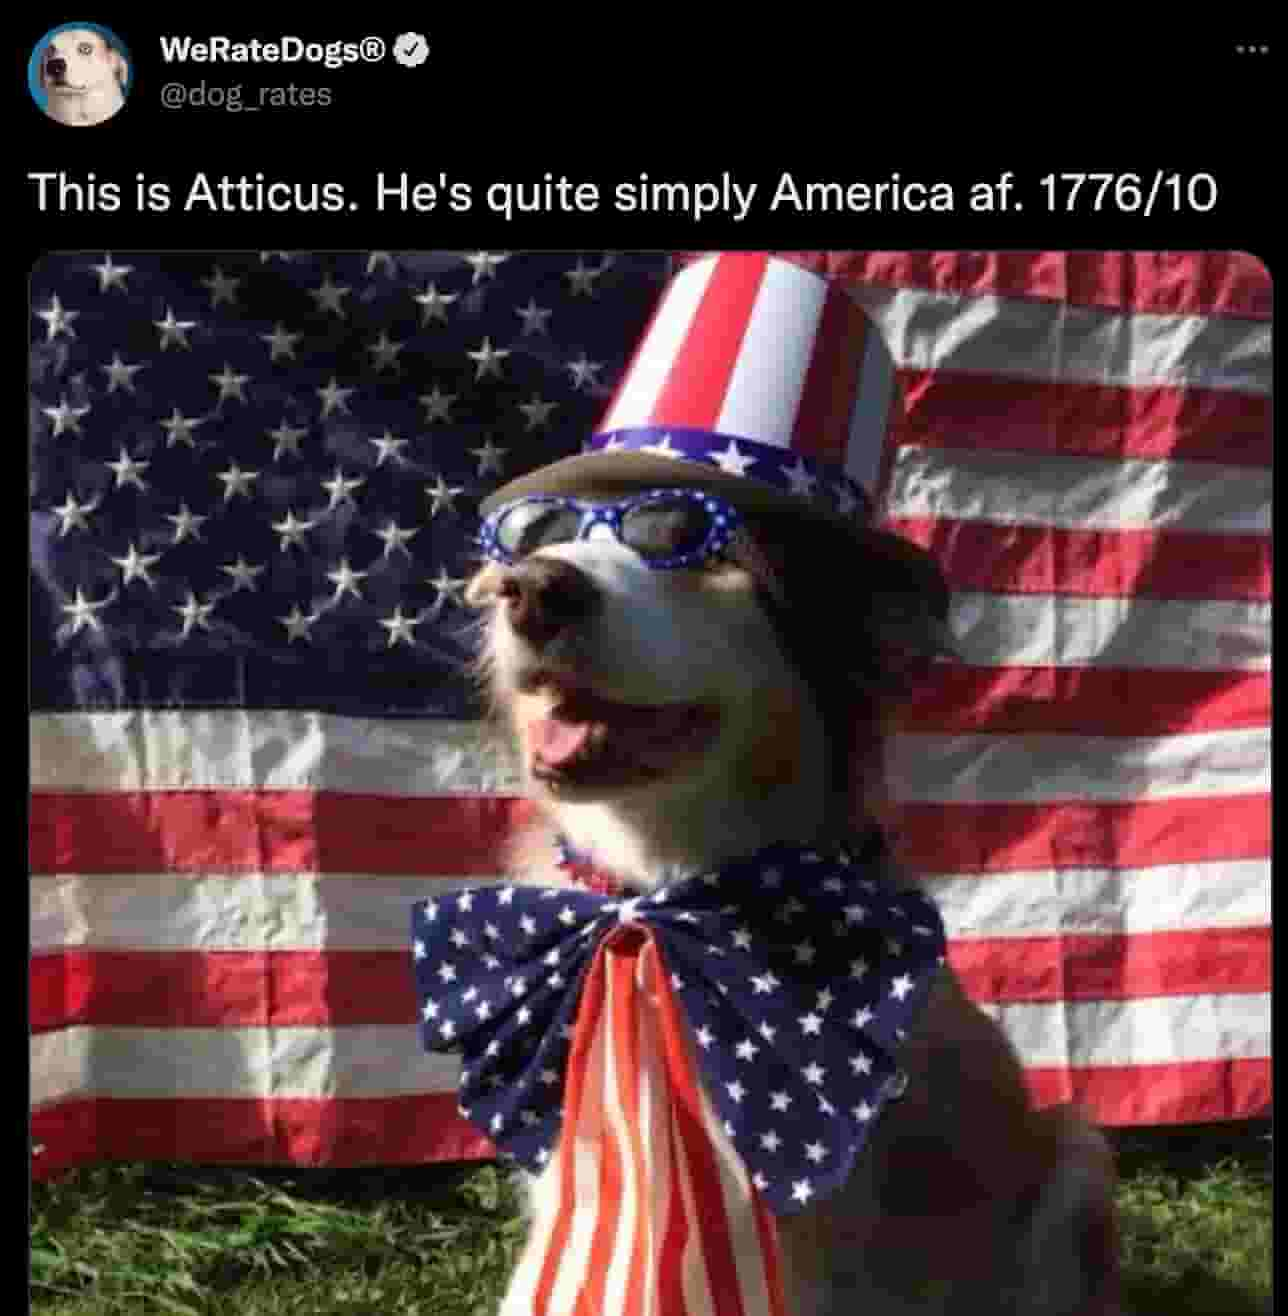

In [70]:
# tweet_id = 749981277374128128
Image(filename='america.jpg', width = 300, height = 250) 

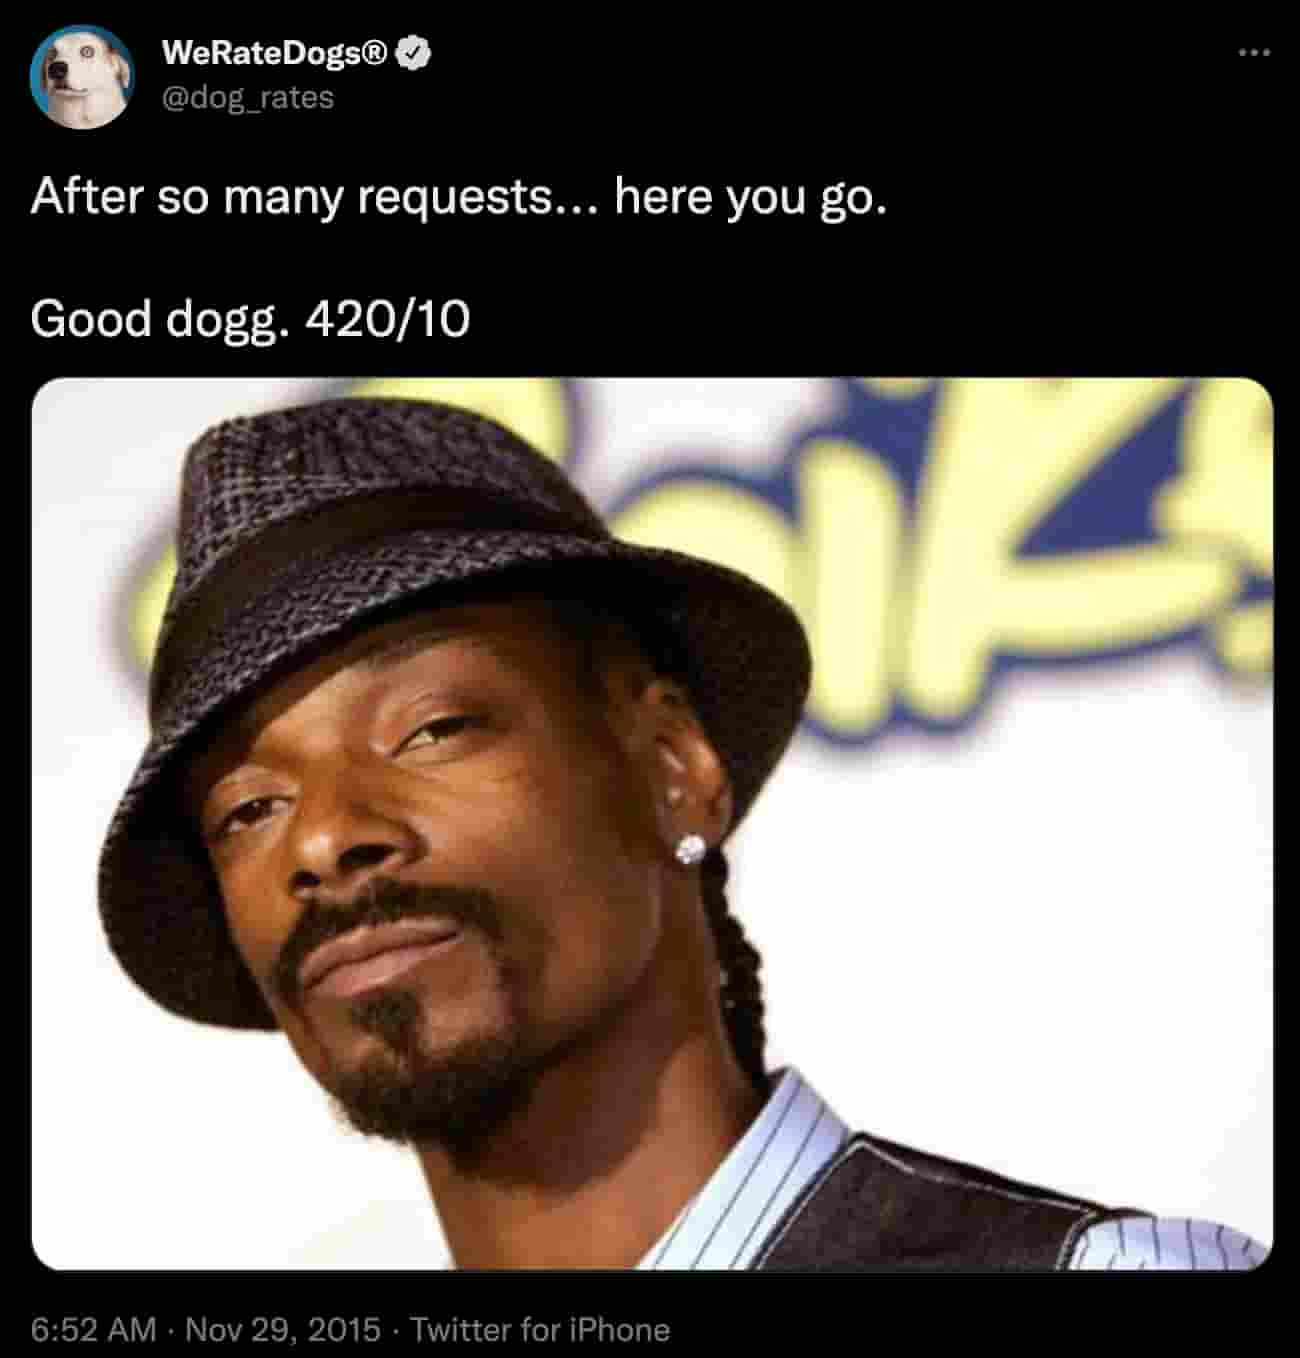

In [71]:
# tweet_id = 670842764863651840
Image(filename='snoop.jpg',width = 300, height = 250) 

Apart from the tweets that made me laugh, which I attached screenshots above, I noticed two patterns:
1. For denominators that are exactly 10, some of the tweets had float numbers as numerators. tweet_id 680494726643068929 for instance. We will need to get the actual figure and probably round it to an integer.
2. For denominators that are above 10 and are multiples of 10, the numerators and denominators have common factors. So we can get the actual value of the ratings by dividing the numerator by the number that makes the denomiator a multiple of 10. tweet_id 820690588416831489 is an eample.

We shall go ahead and clean the ratings columns for all tweets, so we can be sure we have the right ratings.

In [72]:
# A function to select the ratings using regular expression
# we would get the ratings from each tweet text and split them into numerator and denominator
# we would convert the ratings from string to floats and round them to become integers
# we would use the ceil method for the numerators because we don't want to round down the ratings. Afterall, our dogs are good dogs :)

def get_ratings(text):
    try:
        pattern = "[0-9]+[.]?[0-9]*[\/]([0-9]+[.]?[0-9]*)*"
        search = re.search(pattern, text)
        ratings = search.group().split('/')
        numerator = math.ceil(float(ratings[0]))
        denominator = math.floor(float(ratings[1]))
        if (denominator > 10 and denominator%10 == 0):
            factor = denominator/10
            denominator = 10
            numerator = math.ceil(numerator/factor)
        return [numerator, denominator]
    except:
        print(text)

In [73]:
get_ratings("This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 120/100")

[7, 11]

In [74]:
cleaned_stages['rating_numerator'] = cleaned_stages['text'].apply(lambda x:get_ratings(x)[0])
cleaned_stages['rating_denominator'] = cleaned_stages['text'].apply(lambda x:get_ratings(x)[1])

Let us check the high value numerators again to see what effect our changes have had.

In [75]:
cleaned_stages[cleaned_stages.rating_numerator.ge(20)]

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stage
314,810984652412424192,NaN,iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,5036,1328,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,2016-12-19,23:06:23,None
593,749981277374128128,NaN,TweetDeck,This is Atticus. He's quite simply America af....,1776,10,Atticus,4770,2271,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,2016-07-04,15:00:45,None
1405,670842764863651840,NaN,iPhone,After so many requests... here you go.\n\nGood...,420,10,None,22014,7558,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,...,False,accordion,0.094075,False,drumstick,0.061113,False,2015-11-29,05:52:33,None


We have successfully cleaned all the ratings except for these "special" tweets which we would be treating in another section.

At this point, we can rename our dataframe to something more relatable to what we did. Let's do a copy for that.

In [76]:
cleaned_df = cleaned_stages.copy()

#### Test

Let us test to see the new ratings of the tweet with tweet_id = 677716515794329600. It was 144/120 before we cleaned.

In [77]:
tweet_index_3 = cleaned_df[cleaned_df.tweet_id == 677716515794329600].index.tolist()[0]
cleaned_df.loc[tweet_index_3]['text']

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [78]:
cleaned_df.loc[tweet_index_3]['rating_numerator']

12

In [79]:
cleaned_df.loc[tweet_index_3]['rating_denominator']

10

In [80]:
cleaned_df

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stage
0,892420643555336193,NaN,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,33697,6976,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,16:23:56,None
1,892177421306343426,NaN,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,29232,5278,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27,None
2,891815181378084864,NaN,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,21975,3466,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,00:18:03,None
3,891689557279858688,NaN,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,36779,7190,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30,15:58:51,None
4,891327558926688256,NaN,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,35166,7723,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29,16:00:24,None
5,891087950875897856,NaN,iPhone,Here we have a majestic great white breaching ...,13,10,None,17738,2586,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2017-07-29,00:08:17,None
6,890971913173991426,NaN,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,10325,1649,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2017-07-28,16:27:12,None
7,890729181411237888,NaN,iPhone,When you watch your owner call another dog a g...,13,10,None,56644,15692,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,2017-07-28,00:22:40,None
8,890609185150312448,NaN,iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,24433,3605,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,2017-07-27,16:25:51,None
9,890006608113172480,NaN,iPhone,This is Koda. He is a South Australian decksha...,13,10,Koda,26954,6119,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,True,Pomeranian,0.013884,True,chow,0.008167,True,2017-07-26,00:31:25,None


In [81]:
cleaned_df.describe()

,tweet_id,in_reply_to_status_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.975000e+03,2.200000e+01,1975.000000,1975.000000,1975.000000,1975.00000,1975.000000,1975.000000,1.975000e+03,1.975000e+03
mean,7.353010e+17,6.962067e+17,11.644557,9.995443,7640.430886,2221.14481,1.204051,0.592617,1.347084e-01,6.044364e-02
std,6.739632e+16,4.391913e+16,40.835874,0.194867,11294.859997,3989.48769,0.562582,0.271891,1.006379e-01,5.092258e-02
min,6.660209e+17,6.671522e+17,0.000000,2.000000,66.000000,11.00000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757610e+17,6.724855e+17,10.000000,10.000000,1623.000000,491.00000,1.000000,0.361530,5.426840e-02,1.639050e-02
50%,7.079958e+17,6.756022e+17,11.000000,10.000000,3408.000000,1069.00000,1.000000,0.586951,1.180890e-01,4.970020e-02
75%,7.866870e+17,7.002919e+17,12.000000,10.000000,9513.500000,2535.50000,1.000000,0.842673,1.953115e-01,9.164355e-02
max,8.924206e+17,8.558181e+17,1776.000000,11.000000,144273.000000,70398.00000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [82]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 23 columns):
tweet_id                 1975 non-null int64
in_reply_to_status_id    22 non-null float64
source                   1975 non-null object
text                     1975 non-null object
rating_numerator         1975 non-null int64
rating_denominator       1975 non-null int64
name                     1975 non-null object
favorite_count           1975 non-null int64
retweet_count            1975 non-null int64
jpg_url                  1975 non-null object
img_num                  1975 non-null int64
p1                       1975 non-null object
p1_conf                  1975 non-null float64
p1_dog                   1975 non-null bool
p2                       1975 non-null object
p2_conf                  1975 non-null float64
p2_dog                   1975 non-null bool
p3                       1975 non-null object
p3_conf                  1975 non-null float64
p3_dog                   19

### Issue #9:  <a name="issue9"></a>

#### Define

rating_numerator with a high value of 1776 and rating_denominator value of 10. The numerator value is very high but the denominator remains 10. This is a different case from the denominators that are in multiples of 10. This number is way higher than expected (compared to the mean and the percentile values). We have two other tweets we planed to drop.

In [83]:
cleaned_df[cleaned_df.rating_numerator.ge(20)]

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stage
314,810984652412424192,NaN,iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,5036,1328,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,2016-12-19,23:06:23,None
593,749981277374128128,NaN,TweetDeck,This is Atticus. He's quite simply America af....,1776,10,Atticus,4770,2271,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,2016-07-04,15:00:45,None
1405,670842764863651840,NaN,iPhone,After so many requests... here you go.\n\nGood...,420,10,None,22014,7558,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,...,False,accordion,0.094075,False,drumstick,0.061113,False,2015-11-29,05:52:33,None


#### Code

In [84]:
cleaned_df.drop(cleaned_df.loc[cleaned_df.rating_numerator.ge(20)].index, inplace=True)

In [85]:
cleaned_df.describe()

,tweet_id,in_reply_to_status_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.972000e+03,2.200000e+01,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1.972000e+03,1.972000e+03
mean,7.352878e+17,6.962067e+17,10.536511,9.996957,7635.918357,2218.866126,1.204361,0.592757,1.348060e-01,6.046575e-02
std,6.740960e+16,4.391913e+16,2.195698,0.182965,11298.476755,3990.661047,0.562953,0.271792,1.006788e-01,5.095488e-02
min,6.660209e+17,6.671522e+17,0.000000,2.000000,66.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757713e+17,6.724855e+17,10.000000,10.000000,1620.750000,490.750000,1.000000,0.362063,5.429525e-02,1.634625e-02
50%,7.079828e+17,6.756022e+17,11.000000,10.000000,3407.500000,1060.000000,1.000000,0.587026,1.184015e-01,4.967815e-02
75%,7.866760e+17,7.002919e+17,12.000000,10.000000,9513.250000,2535.250000,1.000000,0.842330,1.954432e-01,9.174633e-02
max,8.924206e+17,8.558181e+17,14.000000,11.000000,144273.000000,70398.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


Let's see the tweets with rating denomiator of 11

In [86]:
cleaned_df[cleaned_df.rating_denominator.ge(11)]

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stage
652,740373189193256964,NaN,iPhone,"After so many requests, this is Bretagne. She ...",9,11,None,32434,12096,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,...,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,2016-06-08,02:41:38,None
1080,682962037429899265,NaN,iPhone,This is Darrel. He just robbed a 7/11 and is i...,7,11,Darrel,33686,14839,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,...,False,Chihuahua,0.155207,True,loupe,0.153598,False,2016-01-01,16:30:13,None


In [87]:
tweet_index_4 = twitter_archive[twitter_archive.tweet_id == 740373189193256964].index.tolist()[0]
twitter_archive.loc[tweet_index_4]['text']

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

These 2 tweets with denominator of 11 were wrongly read by the function I used to get the ratings. I have tried to find the perfect regular expression but found nothing. I think it's best to just drop theem.

In [88]:
cleaned_df.drop(cleaned_df.loc[cleaned_df.rating_denominator.ge(11)].index, inplace=True)

#### Test

In [89]:
cleaned_df.describe()

,tweet_id,in_reply_to_status_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.970000e+03,2.200000e+01,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1.970000e+03,1.970000e+03
mean,7.353118e+17,6.962067e+17,10.539086,9.995939,7610.107107,2207.446193,1.203553,0.592807,1.348127e-01,6.043710e-02
std,6.743342e+16,4.391913e+16,2.195092,0.180242,11275.088343,3976.303145,0.561764,0.271795,1.007260e-01,5.093081e-02
min,6.660209e+17,6.671522e+17,0.000000,2.000000,66.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757507e+17,6.724855e+17,10.000000,10.000000,1620.250000,490.250000,1.000000,0.362656,5.424155e-02,1.628435e-02
50%,7.079828e+17,6.756022e+17,11.000000,10.000000,3405.500000,1054.500000,1.000000,0.587026,1.184015e-01,4.967815e-02
75%,7.866981e+17,7.002919e+17,12.000000,10.000000,9458.000000,2532.750000,1.000000,0.843016,1.955197e-01,9.166433e-02
max,8.924206e+17,8.558181e+17,14.000000,10.000000,144273.000000,70398.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


### Issue #10: <a name="issue10"></a>

#### Define

Some of the tweets are not for dogs. For instance, the tweet with id 666362758909284353 is not about a dog and all the predictions are false for dogs. The tweet with id 666057090499244032 is about a dog in a shopping cart and only one out of the 3 predictions are true for dogs. 

#### Code

We will first drop all the tweets that have false for all 3 predictions. Then, for the remaining tweets, we will pick the prediction that is both true and of the highest confidence (if there are other true predictions).

In [90]:
cleaned_df.drop(cleaned_df.loc[(cleaned_df['p1_dog'] == False) & (cleaned_df['p2_dog'] == False) & (cleaned_df['p3_dog'] == False)].index, inplace=True)

In [91]:
cleaned_df

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stage
1,892177421306343426,NaN,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,29232,5278,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27,None
2,891815181378084864,NaN,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,21975,3466,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,00:18:03,None
3,891689557279858688,NaN,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,36779,7190,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30,15:58:51,None
4,891327558926688256,NaN,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,35166,7723,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29,16:00:24,None
5,891087950875897856,NaN,iPhone,Here we have a majestic great white breaching ...,13,10,None,17738,2586,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2017-07-29,00:08:17,None
6,890971913173991426,NaN,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,10325,1649,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2017-07-28,16:27:12,None
7,890729181411237888,NaN,iPhone,When you watch your owner call another dog a g...,13,10,None,56644,15692,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,2017-07-28,00:22:40,None
8,890609185150312448,NaN,iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,24433,3605,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,2017-07-27,16:25:51,None
9,890006608113172480,NaN,iPhone,This is Koda. He is a South Australian decksha...,13,10,Koda,26954,6119,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,True,Pomeranian,0.013884,True,chow,0.008167,True,2017-07-26,00:31:25,None
10,889880896479866881,NaN,iPhone,This is Bruno. He is a service shark. Only get...,13,10,Bruno,24495,4142,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,...,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False,2017-07-25,16:11:53,None


In [92]:
# A function to get the right dog prediction
def get_dog_breed(p1, p1_dog, p1_conf, p2, p2_dog, p2_conf, p3, p3_dog, p3_conf):
    if p1_dog:
        return pd.Series([p1, p1_conf])
    elif p2_dog:
        return pd.Series([p2, p2_conf])
    elif p3_dog:
        return pd.Series([p3, p3_conf])
    else:
        return pd.Series(["None", 0])
        
cleaned_df[['breed_pred','pred_conf']]  = cleaned_df.apply(lambda x: get_dog_breed(x['p1'], x['p1_dog'], x['p1_conf'], x['p2'], x['p2_dog'], x['p2_conf'], x['p3'], x['p3_dog'], x['p3_conf']), axis=1)


Let's see if any "None" breed_pred was returned.

In [93]:
cleaned_df[cleaned_df['breed_pred'] == "None"]

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stage,breed_pred,pred_conf


Finally we will drop the following columns since we no longer need them: 'jpg_url', 'img_num', 'p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf'

In [94]:
cleaned_df.drop(columns=['jpg_url', 'img_num', 'p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf'], inplace=True)
cleaned_df

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,date,time,dog_stage,breed_pred,pred_conf
1,892177421306343426,NaN,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,29232,5278,2017-08-01,00:17:27,None,Chihuahua,0.323581
2,891815181378084864,NaN,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,21975,3466,2017-07-31,00:18:03,None,Chihuahua,0.716012
3,891689557279858688,NaN,iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,36779,7190,2017-07-30,15:58:51,None,Labrador_retriever,0.168086
4,891327558926688256,NaN,iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,35166,7723,2017-07-29,16:00:24,None,basset,0.555712
5,891087950875897856,NaN,iPhone,Here we have a majestic great white breaching ...,13,10,None,17738,2586,2017-07-29,00:08:17,None,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,NaN,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,10325,1649,2017-07-28,16:27:12,None,Appenzeller,0.341703
7,890729181411237888,NaN,iPhone,When you watch your owner call another dog a g...,13,10,None,56644,15692,2017-07-28,00:22:40,None,Pomeranian,0.566142
8,890609185150312448,NaN,iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,24433,3605,2017-07-27,16:25:51,None,Irish_terrier,0.487574
9,890006608113172480,NaN,iPhone,This is Koda. He is a South Australian decksha...,13,10,Koda,26954,6119,2017-07-26,00:31:25,None,Samoyed,0.957979
10,889880896479866881,NaN,iPhone,This is Bruno. He is a service shark. Only get...,13,10,Bruno,24495,4142,2017-07-25,16:11:53,None,French_bulldog,0.377417


In [95]:
# Let's rearrange the columns for better visual analysis, and reset the index
cleaned_data_frame = cleaned_df[['tweet_id', 'date', 'time', 'name', 'rating_numerator', 'rating_denominator', 'breed_pred', 'pred_conf', 'dog_stage', 'source', 'text', 'favorite_count', 'retweet_count']]
cleaned_data_frame.reset_index(drop=True, inplace=True)

#### Test

In [96]:
cleaned_data_frame

,tweet_id,date,time,name,rating_numerator,rating_denominator,breed_pred,pred_conf,dog_stage,source,text,favorite_count,retweet_count
0,892177421306343426,2017-08-01,00:17:27,Tilly,13,10,Chihuahua,0.323581,None,iPhone,This is Tilly. She's just checking pup on you....,29232,5278
1,891815181378084864,2017-07-31,00:18:03,Archie,12,10,Chihuahua,0.716012,None,iPhone,This is Archie. He is a rare Norwegian Pouncin...,21975,3466
2,891689557279858688,2017-07-30,15:58:51,Darla,13,10,Labrador_retriever,0.168086,None,iPhone,This is Darla. She commenced a snooze mid meal...,36779,7190
3,891327558926688256,2017-07-29,16:00:24,Franklin,12,10,basset,0.555712,None,iPhone,This is Franklin. He would like you to stop ca...,35166,7723
4,891087950875897856,2017-07-29,00:08:17,None,13,10,Chesapeake_Bay_retriever,0.425595,None,iPhone,Here we have a majestic great white breaching ...,17738,2586
5,890971913173991426,2017-07-28,16:27:12,Jax,13,10,Appenzeller,0.341703,None,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,10325,1649
6,890729181411237888,2017-07-28,00:22:40,None,13,10,Pomeranian,0.566142,None,iPhone,When you watch your owner call another dog a g...,56644,15692
7,890609185150312448,2017-07-27,16:25:51,Zoey,13,10,Irish_terrier,0.487574,None,iPhone,This is Zoey. She doesn't want to be one of th...,24433,3605
8,890006608113172480,2017-07-26,00:31:25,Koda,13,10,Samoyed,0.957979,None,iPhone,This is Koda. He is a South Australian decksha...,26954,6119
9,889880896479866881,2017-07-25,16:11:53,Bruno,13,10,French_bulldog,0.377417,None,iPhone,This is Bruno. He is a service shark. Only get...,24495,4142


In [97]:
cleaned_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 13 columns):
tweet_id              1665 non-null int64
date                  1665 non-null object
time                  1665 non-null object
name                  1665 non-null object
rating_numerator      1665 non-null int64
rating_denominator    1665 non-null int64
breed_pred            1665 non-null object
pred_conf             1665 non-null float64
dog_stage             1665 non-null object
source                1665 non-null object
text                  1665 non-null object
favorite_count        1665 non-null int64
retweet_count         1665 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 169.2+ KB


In [98]:
cleaned_data_frame.describe()

,tweet_id,rating_numerator,rating_denominator,pred_conf,favorite_count,retweet_count
count,1.665000e+03,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,7.386757e+17,10.821021,9.995195,0.548009,7894.714715,2245.658258
std,6.796130e+16,1.799216,0.196057,0.299266,11682.558656,4109.679195
min,6.660209e+17,0.000000,2.000000,0.000010,66.000000,11.000000
25%,6.772693e+17,10.000000,10.000000,0.298881,1791.000000,509.000000
50%,7.117438e+17,11.000000,10.000000,0.547935,3584.000000,1118.000000
75%,7.923946e+17,12.000000,10.000000,0.819511,9770.000000,2571.000000
max,8.921774e+17,14.000000,10.000000,0.999956,144273.000000,70398.000000


## Storing Ceaned Data  <a name="storing"></a>

In [99]:
cleaned_data_frame.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data   <a name="analyzing"></a>

In [100]:
master_df = pd.read_csv("twitter_archive_master.csv")
master_df.head()

,tweet_id,date,time,name,rating_numerator,rating_denominator,breed_pred,pred_conf,dog_stage,source,text,favorite_count,retweet_count
0,892177421306343426,2017-08-01,00:17:27,Tilly,13,10,Chihuahua,0.323581,None,iPhone,This is Tilly. She's just checking pup on you....,29232,5278
1,891815181378084864,2017-07-31,00:18:03,Archie,12,10,Chihuahua,0.716012,None,iPhone,This is Archie. He is a rare Norwegian Pouncin...,21975,3466
2,891689557279858688,2017-07-30,15:58:51,Darla,13,10,Labrador_retriever,0.168086,None,iPhone,This is Darla. She commenced a snooze mid meal...,36779,7190
3,891327558926688256,2017-07-29,16:00:24,Franklin,12,10,basset,0.555712,None,iPhone,This is Franklin. He would like you to stop ca...,35166,7723
4,891087950875897856,2017-07-29,00:08:17,None,13,10,Chesapeake_Bay_retriever,0.425595,None,iPhone,Here we have a majestic great white breaching ...,17738,2586


In [101]:
# Analyze by dog_stage
master_df.dog_stage.value_counts()

None       1416
pupper      168
doggo        53
puppo        21
floofer       7
Name: dog_stage, dtype: int64

In [102]:
master_df.dog_stage.value_counts(normalize=True)

None       0.850450
pupper     0.100901
doggo      0.031832
puppo      0.012613
floofer    0.004204
Name: dog_stage, dtype: float64

In [103]:
# Analyze by source
master_df.source.value_counts()

iPhone        1635
Web Client      22
TweetDeck        8
Name: source, dtype: int64

In [104]:
# What percentage of the tweets came from the most source?
master_df.source.value_counts(normalize=True)

iPhone        0.981982
Web Client    0.013213
TweetDeck     0.004805
Name: source, dtype: float64

In [105]:
# Analyze by dog breed (breed_pred)
master_df.breed_pred.value_counts()

golden_retriever               152
Labrador_retriever             104
Pembroke                        95
Chihuahua                       90
pug                             62
toy_poodle                      50
chow                            48
Pomeranian                      42
Samoyed                         41
malamute                        33
Chesapeake_Bay_retriever        31
cocker_spaniel                  30
French_bulldog                  30
miniature_pinscher              25
Eskimo_dog                      22
German_shepherd                 21
Cardigan                        21
Siberian_husky                  20
Staffordshire_bullterrier       20
beagle                          20
Shih-Tzu                        20
Maltese_dog                     19
Rottweiler                      19
Shetland_sheepdog               19
kuvasz                          18
Lakeland_terrier                18
Italian_greyhound               17
basset                          17
West_Highland_white_

In [106]:
master_df.breed_pred.value_counts(normalize=True)[0:5]

golden_retriever      0.091291
Labrador_retriever    0.062462
Pembroke              0.057057
Chihuahua             0.054054
pug                   0.037237
Name: breed_pred, dtype: float64

For this dataset, we have 113 dog breeds. Google says we have 360 official dog breeds and I think our dataset captures a good number of them.

Let us group our data by the time of the day the twee was sent. With this we can get an insight on what time of the day most of thhe tweets were sent and how that affects retweets and likes


In [107]:
# A function to get part of the day from the time column
def get_part_of_the_day(hour):
    if 5 <= hour <= 11:
        return "morning"
    elif 12 <= hour <= 16:
        return "afternoon"
    elif 17 <= hour <= 22:
        return "evening"
    else:
        return "night"

master_df['part_of_day'] = master_df.time.apply(lambda x: get_part_of_the_day(dateutil.parser.parse(x).hour)) 

In [108]:
master_df

,tweet_id,date,time,name,rating_numerator,rating_denominator,breed_pred,pred_conf,dog_stage,source,text,favorite_count,retweet_count,part_of_day
0,892177421306343426,2017-08-01,00:17:27,Tilly,13,10,Chihuahua,0.323581,None,iPhone,This is Tilly. She's just checking pup on you....,29232,5278,night
1,891815181378084864,2017-07-31,00:18:03,Archie,12,10,Chihuahua,0.716012,None,iPhone,This is Archie. He is a rare Norwegian Pouncin...,21975,3466,night
2,891689557279858688,2017-07-30,15:58:51,Darla,13,10,Labrador_retriever,0.168086,None,iPhone,This is Darla. She commenced a snooze mid meal...,36779,7190,afternoon
3,891327558926688256,2017-07-29,16:00:24,Franklin,12,10,basset,0.555712,None,iPhone,This is Franklin. He would like you to stop ca...,35166,7723,afternoon
4,891087950875897856,2017-07-29,00:08:17,None,13,10,Chesapeake_Bay_retriever,0.425595,None,iPhone,Here we have a majestic great white breaching ...,17738,2586,night
5,890971913173991426,2017-07-28,16:27:12,Jax,13,10,Appenzeller,0.341703,None,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,10325,1649,afternoon
6,890729181411237888,2017-07-28,00:22:40,None,13,10,Pomeranian,0.566142,None,iPhone,When you watch your owner call another dog a g...,56644,15692,night
7,890609185150312448,2017-07-27,16:25:51,Zoey,13,10,Irish_terrier,0.487574,None,iPhone,This is Zoey. She doesn't want to be one of th...,24433,3605,afternoon
8,890006608113172480,2017-07-26,00:31:25,Koda,13,10,Samoyed,0.957979,None,iPhone,This is Koda. He is a South Australian decksha...,26954,6119,night
9,889880896479866881,2017-07-25,16:11:53,Bruno,13,10,French_bulldog,0.377417,None,iPhone,This is Bruno. He is a service shark. Only get...,24495,4142,afternoon


In [109]:
master_df.part_of_day.value_counts()

night        933
evening      464
afternoon    247
morning       21
Name: part_of_day, dtype: int64

In [110]:
master_df.part_of_day.value_counts(normalize=True)

night        0.560360
evening      0.278679
afternoon    0.148348
morning      0.012613
Name: part_of_day, dtype: float64

In [111]:
master_df.rating_numerator.value_counts()

12    421
10    361
11    360
13    223
9     133
8      68
7      31
14     24
6      16
5      12
4       6
3       5
2       3
1       1
0       1
Name: rating_numerator, dtype: int64

In [112]:
# Top 10 tweets by favorite_count
master_df.nlargest(10, 'favorite_count')

,tweet_id,date,time,name,rating_numerator,rating_denominator,breed_pred,pred_conf,dog_stage,source,text,favorite_count,retweet_count,part_of_day
1461,744234799360020481,2016-06-18,18:26:18,None,13,10,Labrador_retriever,0.825333,doggo,iPhone,Here's a doggo realizing you can stand in a po...,144273,70398,evening
1652,822872901745569793,2017-01-21,18:26:02,None,13,10,Lakeland_terrier,0.196015,puppo,iPhone,Here's a super supportive puppo participating ...,123633,39800,evening
291,807106840509214720,2016-12-09,06:17:20,Stephan,13,10,Chihuahua,0.505370,None,iPhone,This is Stephan. He just wants to help. 13/10 ...,111221,51467,morning
1483,866450705531457537,2017-05-22,00:28:40,Jamesy,13,10,French_bulldog,0.905334,pupper,iPhone,This is Jamesy. He gives a kiss to every other...,108503,30080,night
1462,739238157791694849,2016-06-04,23:31:25,None,13,10,Eskimo_dog,0.503372,doggo,iPhone,Here's a doggo blowing bubbles. It's downright...,106794,52675,night
45,879415818425184262,2017-06-26,19:07:24,Duddles,13,10,English_springer,0.383404,None,iPhone,This is Duddles. He did an attempt. 13/10 some...,92489,37254,evening
1440,819004803107983360,2017-01-11,02:15:36,Bo,14,10,standard_poodle,0.351308,doggo,iPhone,This is Bo. He was a very good First Doggo. 14...,82375,34442,night
101,859196978902773760,2017-05-02,00:04:57,quite,12,10,malamute,0.216163,None,iPhone,We only rate dogs. This is quite clearly a smo...,80181,26187,night
69,870374049280663552,2017-06-01,20:18:38,Zoey,13,10,golden_retriever,0.841001,None,iPhone,This is Zoey. She really likes the planet. Wou...,73722,22672,evening
1011,678399652199309312,2015-12-20,02:20:55,None,12,10,Bedlington_terrier,0.015047,None,iPhone,This made my day. 12/10 please enjoy https://t...,73202,28475,night


In [113]:
# Top 10 tweets by retweet_count
master_df.nlargest(10, 'retweet_count')

,tweet_id,date,time,name,rating_numerator,rating_denominator,breed_pred,pred_conf,dog_stage,source,text,favorite_count,retweet_count,part_of_day
1461,744234799360020481,2016-06-18,18:26:18,None,13,10,Labrador_retriever,0.825333,doggo,iPhone,Here's a doggo realizing you can stand in a po...,144273,70398,evening
1462,739238157791694849,2016-06-04,23:31:25,None,13,10,Eskimo_dog,0.503372,doggo,iPhone,Here's a doggo blowing bubbles. It's downright...,106794,52675,night
291,807106840509214720,2016-12-09,06:17:20,Stephan,13,10,Chihuahua,0.505370,None,iPhone,This is Stephan. He just wants to help. 13/10 ...,111221,51467,morning
1652,822872901745569793,2017-01-21,18:26:02,None,13,10,Lakeland_terrier,0.196015,puppo,iPhone,Here's a super supportive puppo participating ...,123633,39800,evening
45,879415818425184262,2017-06-26,19:07:24,Duddles,13,10,English_springer,0.383404,None,iPhone,This is Duddles. He did an attempt. 13/10 some...,92489,37254,evening
1440,819004803107983360,2017-01-11,02:15:36,Bo,14,10,standard_poodle,0.351308,doggo,iPhone,This is Bo. He was a very good First Doggo. 14...,82375,34442,night
293,806629075125202948,2016-12-07,22:38:52,None,13,10,cocker_spaniel,0.046403,None,iPhone,"""Good afternoon class today we're going to lea...",70332,32245,evening
1483,866450705531457537,2017-05-22,00:28:40,Jamesy,13,10,French_bulldog,0.905334,pupper,iPhone,This is Jamesy. He gives a kiss to every other...,108503,30080,night
1011,678399652199309312,2015-12-20,02:20:55,None,12,10,Bedlington_terrier,0.015047,None,iPhone,This made my day. 12/10 please enjoy https://t...,73202,28475,night
1050,676219687039057920,2015-12-14,01:58:31,Kenneth,10,10,whippet,0.000132,None,iPhone,This is Kenneth. He's stuck in a bubble. 10/10...,70671,27671,night


### Insights: <a name="insights"></a>
1. The top 5 breeds of the dogs are:  
    a. Golden Retriever  
    b. Labrador Retriever  
    c. Pembroke  
    d. Chihuahua  
    e. Pug  
2. 98% of the tweets were tweeted from an iPhone device, others were either sent from the web or from Tweet Deck.
3. 90% of the top 10 tweets (by retweet count and favorite count) were tweeted between afternoon and night.
4. The top 10 tweets (by retweet count and favorite count) have rating numerators above 10
5. 84% of the tweets were tweeted between afternoon and night.
6. For dog stages, 85% of the tweets don't have dogs stages but the ones that have are in the following percentages:
    a. 10% of the tweets show a pupper stage dog,  
    b. 3% of the tweets show a doggo stage dog,  
    c. 1.2% of the tweets show a puppo stage dog, while  
    d. 0.4% of the tweets show a floofer stage dog.

### Visualization <a name="visualization"></a>

Let us see the correlation between Favorite Count and Retweet Count. 

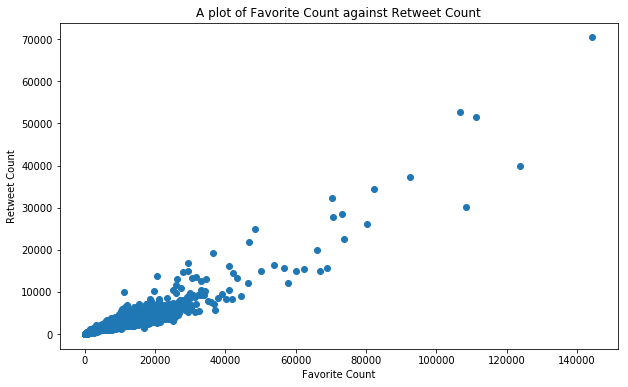

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(master_df['favorite_count'], master_df['retweet_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('A plot of Favorite Count against Retweet Count')
plt.show()

We can see a positive correlation here. This implies that the most favorite tweets were retweeted the most.